In [ ]:
# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

ModuleNotFoundError: No module named 'sklearn'

In [2]:
df = pd.read_csv('mrdata/btc.csv',parse_dates=["Date"])

Text(0, 0.5, '$ Price')

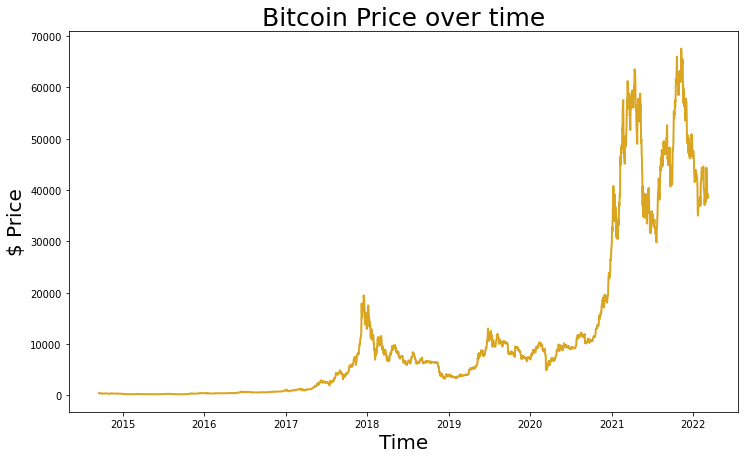

In [4]:
plt.figure(figsize = (12, 7))
plt.plot(df["Date"], df["Adj Close"], color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [3]:
df.sample(10)

,Date,Open,High,Low,Close,Adj Close,Volume
2522,2021-08-13,44439.691406,47831.976563,44282.417969,47793.320313,47793.320313,31744259539
975,2017-05-19,1897.369995,2004.520020,1890.250000,1987.709961,1987.709961,1157289984
1922,2019-12-22,7191.188477,7518.033203,7167.179199,7511.588867,7511.588867,23134537956
2556,2021-09-16,48158.906250,48486.828125,47079.558594,47783.359375,47783.359375,31764293754
2228,2020-10-23,12971.548828,13015.961914,12752.647461,12931.539063,12931.539063,28974975003
617,2016-05-26,449.671997,453.644012,447.895996,453.384003,453.384003,65203800
120,2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504
474,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
409,2015-10-31,328.511993,332.777008,309.251007,314.165985,314.165985,48598100
1876,2019-11-06,9340.864258,9423.237305,9305.909180,9360.879883,9360.879883,23133895765


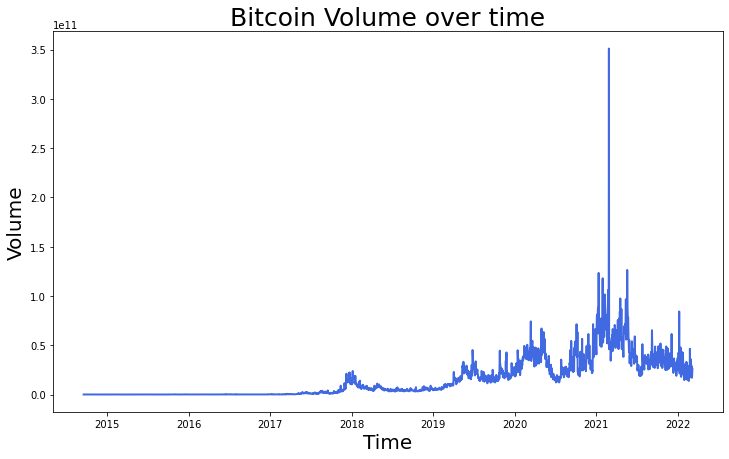

In [5]:
plt.figure(figsize = (12, 7))
plt.plot(df["Date"], df["Volume"], color='royalblue', lw=2)
plt.title("Bitcoin Volume over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Volume", size=20);

In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df['Date'] = pd.to_datetime(df['Date'], unit='s')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [6]:
required_features = ['Open', 'High', 'Low', 'Volume','Adj Close']
output_label = 'Close'

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
df[required_features],
df[output_label],
test_size = 0.3
)

In [8]:
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [11]:
model.score(x_test, y_test)

1.0

In [12]:
future_set = df.shift(periods=30).tail(30)

In [13]:
prediction = model.predict(future_set[required_features])

Text(0, 0.5, '$ Price')

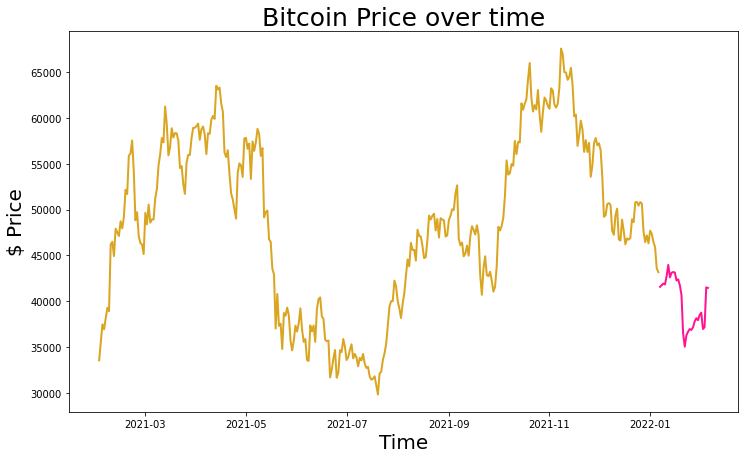

In [15]:
plt.figure(figsize = (12, 7))
plt.plot(df["Date"][-400:-60], df["Adj Close"][-400:-60], color='goldenrod', lw=2)
plt.plot(future_set["Date"], prediction, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [10]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense


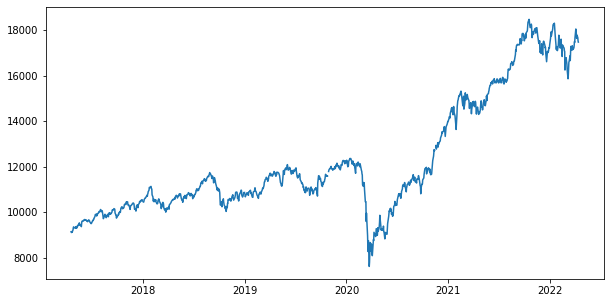

In [18]:
df=pd.read_csv("nifty50.csv",parse_dates=True,index_col ='Date')
df.head()

plt.figure(figsize=(10,5))
plt.plot(df["Close"],label='Close Price history')

In [13]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2017-04-17,2017-04-17,9144.750000,9160.000000,9120.250000,9139.299805,9139.299805,0.0
2017-04-18,2017-04-18,9163.000000,9217.900391,9095.450195,9105.150391,9105.150391,174200.0
2017-04-19,2017-04-19,9112.200195,9120.500000,9075.150391,9103.500000,9103.500000,173700.0
2017-04-20,2017-04-20,9108.099609,9143.900391,9102.650391,9136.400391,9136.400391,170300.0
2017-04-21,2017-04-21,9179.099609,9183.650391,9088.750000,9119.400391,9119.400391,155200.0


In [33]:
nifty_close =df.drop(['Date','Adj Close'],axis=1)

KeyError: "['Date'] not found in axis"

In [20]:
nifty_close.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1236 entries, 2017-04-17 to 2022-04-13
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
1232 non-null   float64
dtypes: float64(1)
memory usage: 19.3 KB


In [22]:
train_data=nifty_close[:1000]
valid_data=nifty_close[1000:1100]


In [29]:
scaler=MinMaxScaler()
train_data = scaler.fit_transform(train_data)

ValueError: Expected 2D array, got 1D array instead:
array=[ 9139.299805  9105.150391  9103.5       9136.400391  9119.400391
  9217.950195  9306.599609  9351.849609  9342.150391  9304.049805
  9313.799805  9311.950195  9359.900391  9285.299805  9314.049805
  9316.849609  9407.299805  9422.400391  9400.900391  9445.400391
  9512.25      9525.75      9429.450195  9427.900391  9438.25
  9386.150391  9360.549805  9509.75      9595.099609  9604.900391
  9624.549805  9621.25      9616.099609  9653.5       9675.099609
  9637.150391  9663.900391  9647.25      9668.25      9616.400391
  9606.900391  9618.150391  9578.049805  9588.049805  9657.549805
  9653.5       9633.599609  9630.        9574.950195  9511.400391
  9491.25      9504.099609  9520.900391  9615.        9613.299805
  9637.599609  9674.549805  9665.799805  9771.049805  9786.049805
  9816.099609  9891.700195  9886.349609  9915.950195  9827.150391
  9899.599609  9873.299805  9915.25      9966.400391  9964.549805
 10020.650391 10020.549805 10014.5      10077.099609 10114.650391
 10081.5      10013.650391 10066.400391 10057.400391  9978.549805
  9908.049805  9820.25      9710.799805  9794.150391  9897.299805
  9904.150391  9837.400391  9754.349609  9765.549805  9852.5
  9857.049805  9912.799805  9796.049805  9884.400391  9917.900391
  9974.400391  9912.849609  9952.200195  9916.200195  9929.900391
  9934.799805 10006.049805 10093.049805 10079.299805 10086.599609
 10085.400391 10153.099609 10147.549805 10141.150391 10121.900391
  9964.400391  9872.599609  9871.5       9735.75      9768.950195
  9788.599609  9859.5       9914.900391  9888.700195  9979.700195
  9988.75     10016.950195  9984.799805 10096.400391 10167.450195
 10230.849609 10234.450195 10210.849609 10146.549805 10184.849609
 10207.700195 10295.349609 10343.799805 10323.049805 10363.650391
 10335.299805 10440.5      10423.799805 10452.5      10451.799805
 10350.150391 10303.150391 10308.950195 10321.75     10224.950195
 10186.599609 10118.049805 10214.75     10283.599609 10298.75
 10326.900391 10342.299805 10348.75     10389.700195 10399.549805
 10370.25     10361.299805 10226.549805 10121.799805 10127.75
 10118.25     10044.099609 10166.700195 10265.650391 10322.25
 10240.150391 10192.950195 10252.099609 10333.25     10388.75
 10463.200195 10444.200195 10440.299805 10493.       10531.5
 10490.75     10477.900391 10530.700195          nan 10442.200195
 10443.200195 10504.799805 10558.849609 10623.599609 10637.
 10632.200195 10651.200195 10681.25     10741.549805 10700.450195
 10788.549805 10817.       10894.700195 10966.200195 11083.700195
 11086.       11069.650391 11130.400391 11049.650391 11027.700195
 11016.900391 10760.599609 10666.549805 10498.25     10476.700195
 10576.849609 10454.950195 10539.75     10500.900391 10545.5
 10452.299805 10378.400391 10360.400391 10397.450195 10382.700195
 10491.049805 10582.599609 10554.299805 10492.849609 10458.349609
 10358.849609 10249.25     10154.200195 10242.650391 10226.849609
 10421.400391 10426.849609 10410.900391 10360.150391 10195.150391
 10094.25     10124.349609 10155.25     10114.75      9998.049805
 10130.650391 10184.150391 10113.700195 10211.799805 10245.
 10128.400391 10325.150391 10331.599609 10379.349609 10402.25
 10417.150391 10458.650391 10480.599609 10528.349609 10548.700195
 10526.200195 10565.299805 10564.049805 10584.700195 10614.349609
 10570.549805 10617.799805 10692.299805 10739.349609 10718.049805
 10679.650391 10618.25     10715.5      10717.799805 10741.700195
 10716.549805 10806.5      10806.599609 10801.849609 10741.099609
 10682.700195 10596.400391 10516.700195 10536.700195 10430.349609
 10513.849609 10605.150391 10688.650391 10633.299805 10614.349609
 10736.150391 10696.200195 10628.5      10593.150391 10684.650391
 10768.349609 10767.650391 10786.950195 10842.849609 10856.700195
 10808.049805 10817.700195 10799.849609 10710.450195 10772.049805
 10741.099609 10821.849609 10762.450195 10769.150391 10671.400391
 10589.099609 10714.299805 10657.299805 10699.900391 10769.900391
 10749.75     10772.650391 10852.900391 10947.25     10948.299805
 11023.200195 11018.900391 10936.849609 11008.049805 10980.450195
 10957.099609 11010.200195 11084.75     11134.299805 11132.
 11167.299805 11278.349609 11319.549805 11356.5      11346.200195
 11244.700195 11360.799805 11387.099609 11389.450195 11450.
 11470.700195 11429.5      11355.75     11435.099609 11385.049805
 11470.75     11551.75     11570.900391 11582.75     11557.099609
 11691.950195 11738.5      11691.900391 11676.799805 11680.5
 11582.349609 11520.299805 11476.950195 11536.900391 11589.099609
 11438.099609 11287.5      11369.900391 11515.200195 11377.75
 11278.900391 11234.349609 11143.099609 10967.400391 11067.450195
 11053.799805 10977.549805 10930.450195 11008.299805 10858.25
 10599.25     10316.450195 10348.049805 10301.049805 10460.099609
 10234.650391 10472.5      10512.5      10584.75     10453.049805
 10303.549805 10245.25     10146.799805 10224.75     10124.900391
 10030.       10250.849609 10198.400391 10386.599609 10380.450195
 10553.       10524.       10530.       10598.400391 10585.200195
 10482.200195 10582.5      10576.299805 10616.700195 10682.200195
 10763.400391 10656.200195 10600.049805 10526.75     10628.599609
 10685.599609 10728.849609 10858.700195 10876.75     10883.75
 10869.5      10782.900391 10601.150391 10693.700195 10488.450195
 10549.150391 10737.599609 10791.549805 10805.450195 10888.349609
 10908.700195 10967.299805 10951.700195 10754.       10663.5
 10729.849609 10779.799805 10859.900391 10862.549805          nan
 10792.5      10672.25     10727.349609 10771.799805 10802.150391
 10855.150391 10821.599609 10794.950195 10737.599609 10886.799805
 10890.299805 10905.200195 10906.950195 10961.849609 10922.75
 10831.5      10849.799805 10780.549805 10661.549805 10652.200195
 10651.799805 10830.950195 10893.650391 10912.25     10934.349609
 11062.450195 11069.400391 10943.599609 10888.799805 10831.400391
 10746.049805 10724.400391 10640.950195 10604.349609 10735.450195
 10789.849609 10791.650391 10880.099609 10835.299805 10806.650391
 10792.5      10863.5      10987.450195 11053.       11058.200195
 11035.400391 11168.049805 11301.200195 11341.700195 11343.25
 11426.849609 11462.200195 11532.400391 11521.049805 11456.900391
 11354.25     11483.25     11445.049805 11570.       11669.150391
 11713.200195 11643.950195 11598.       11665.950195 11604.5
 11671.950195 11584.299805 11596.700195 11643.450195 11690.349609
 11787.150391 11752.799805 11594.450195 11575.950195 11726.150391
 11641.799805 11754.650391 11748.150391 11724.75     11712.25
 11598.25     11497.900391 11359.450195 11301.799805 11278.900391
 11148.200195 11222.049805 11157.       11257.099609 11407.150391
 11828.25     11709.099609 11737.900391 11657.049805 11844.099609
 11924.75     11928.75     11861.099609 11945.900391 11922.799805
 12088.549805 12021.650391 11843.75     11870.650391 11922.700195
 11965.599609 11906.200195 11914.049805 11823.299805 11672.150391
 11691.5      11691.450195 11831.75     11724.099609 11699.650391
 11796.450195 11847.549805 11841.549805 11788.849609 11865.599609
 11910.299805 11916.75     11946.75     11811.150391 11558.599609
 11555.900391 11498.900391 11582.900391 11552.5      11588.349609
 11662.599609 11687.5      11596.900391 11419.25     11346.200195
 11331.049805 11271.299805 11252.150391 11284.299805 11189.200195
 11085.400391 11118.       10980.       10997.349609 10862.599609
 10948.25     10855.5      11032.450195 11109.650391 10925.849609
 11029.400391 11047.799805 11053.900391 11017.       10918.700195
 10741.349609 10829.349609 11057.849609 11105.349609 11046.099609
 10948.299805 11023.25     10797.900391 10844.650391 10847.900391
 10946.200195 11003.049805 11035.700195 10982.799805 11075.900391
 11003.5      10817.599609 10840.650391 10704.799805 11274.200195
 11600.200195 11588.200195 11440.200195 11571.200195 11512.400391
 11474.450195 11359.900391 11314.       11174.75     11126.400391
 11313.299805 11234.549805 11305.049805 11341.150391 11428.299805
 11464.       11586.349609 11661.849609 11588.349609 11604.099609
 11582.599609 11583.900391          nan 11786.849609 11844.099609
 11877.450195 11890.599609 11941.299805 11917.200195 11966.049805
 12012.049805 11908.150391 11913.450195 11840.450195 11872.099609
 11895.450195 11884.5      11940.099609 11999.099609 11968.400391
 11914.400391 12073.75     12037.700195 12100.700195 12151.150391
 12056.049805 12048.200195 11994.200195 12043.200195 12018.400391
 11921.5      11937.5      11856.799805 11910.150391 11971.799805
 12086.700195 12053.950195 12165.       12221.650391 12259.700195
 12271.799805 12262.75     12214.549805 12126.549805 12245.799805
 12255.849609 12168.450195 12182.5      12282.200195 12226.650391
 11993.049805 12052.950195 12025.349609 12215.900391 12256.799805
 12329.549805 12362.299805 12343.299805 12355.5      12352.349609
 12224.549805 12169.849609 12106.900391 12180.349609 12248.25
 12119.       12055.799805 12129.5      12035.799805 11962.099609
 11707.900391 11979.650391 12089.150391 12137.950195 12098.349609
 12031.5      12107.900391 12201.200195 12174.650391 12113.450195
 12045.799805 11992.5      12125.900391 12080.849609 11829.400391
 11797.900391 11678.5      11633.299805 11201.75     11132.75
 11303.299805 11251.       11269.       10989.450195 10451.450195
 10458.400391  9590.150391  9955.200195  9197.400391  8967.049805
  8468.799805  8263.450195  8745.450195  7610.25      7801.049805
  8317.849609  8641.450195  8660.25      8281.099609  8597.75
  8253.799805  8083.799805  8792.200195  8748.75      9111.900391
  8993.849609  8925.299805  8992.799805  9266.75      9261.849609
  8981.450195  9187.299805  9313.900391  9154.400391  9282.299805
  9380.900391  9553.349609  9859.900391  9293.5       9205.599609
  9270.900391  9199.049805  9251.5       9239.200195  9196.549805
  9383.549805  9142.75      9136.849609  8823.25      8879.099609
  9066.549805  9106.25      9039.25      9029.049805  9314.950195
  9490.099609  9580.299805  9826.150391  9979.099609 10061.549805
 10029.099609 10142.150391 10167.450195 10046.650391 10116.150391
  9902.        9972.900391  9813.700195  9914.        9881.150391
 10091.650391 10244.400391 10311.200195 10471.       10305.299805
 10288.900391 10383.       10312.400391 10302.099609 10430.049805
 10551.700195 10607.349609 10763.650391 10799.650391 10705.75
 10813.450195 10768.049805 10802.700195 10607.349609 10618.200195
 10739.950195 10901.700195 11022.200195 11162.25     11132.599609
 11215.450195 11194.150391 11131.799805 11300.549805 11202.849609
 11102.150391 11073.450195 10891.599609 11095.25     11101.650391
 11200.150391 11214.049805 11270.150391 11322.5      11308.400391
 11300.450195 11178.400391 11247.099609 11385.349609 11408.400391
 11312.200195 11371.599609 11466.450195 11472.25     11549.599609
 11559.25     11647.599609 11387.5      11470.25     11535.
 11527.450195 11333.849609 11355.049805 11317.349609 11278.
 11449.25     11464.450195 11440.049805 11521.799805 11604.549805
 11516.099609 11504.950195 11250.549805 11153.650391 11131.849609
 10805.549805 11050.25     11227.549805 11222.400391 11247.549805
 11416.950195 11503.349609 11662.400391 11738.849609 11834.599609
 11914.200195 11930.950195 11934.5      11971.049805 11680.349609
 11762.450195 11873.049805 11896.799805 11937.650391 11896.450195
 11930.349609 11767.75     11889.400391 11729.599609 11670.799805
 11642.400391 11669.150391 11813.5      11908.5      12120.299805
 12263.549805 12461.049805 12631.099609 12749.150391 12690.799805
 12719.950195          nan 12874.200195 12938.25     12771.700195
 12859.049805 12926.450195 13055.150391 12858.400391 12987.
 12968.950195 13109.049805 13113.75     13133.900391 13258.549805
 13355.75     13392.950195 13529.099609 13478.299805 13513.849609
 13558.150391 13567.849609 13682.700195 13740.700195 13760.549805
 13328.400391 13466.299805 13601.099609 13749.25     13873.200195
 13932.599609 13981.950195 13981.75     14018.5      14132.900391
 14199.5      14146.25     14137.349609 14347.25     14484.75
 14563.450195 14564.849609 14595.599609 14433.700195 14281.299805
 14521.150391 14644.700195 14590.349609 14371.900391 14238.900391
 13967.5      13817.549805 13634.599609 14281.200195 14647.849609
 14789.950195 14895.650391 14924.25     15115.799805 15109.299805
 15106.5      15173.299805 15163.299805 15314.700195 15313.450195
 15208.900391 15118.950195 14981.75     14675.700195 14707.799805
 14982.       15097.349609 14529.150391 14761.549805 14919.099609
 15245.599609 15080.75     14938.099609 14956.200195 15098.400391
 15174.799805 15030.950195 14929.5      14910.450195 14721.299805
 14557.849609 14744.       14736.400391 14814.75     14549.400391
 14324.900391 14507.299805 14845.099609 14690.700195 14867.349609
 14637.799805 14683.5      14819.049805 14873.799805 14834.849609
 14310.799805 14504.799805 14581.450195 14617.849609 14359.450195
 14296.400391 14406.150391 14341.349609 14485.       14653.049805
 14864.549805 14894.900391 14631.099609 14634.150391 14496.5     ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


You should consider upgrading via the 'c:\users\91766\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [4]:
import numpy as np

In [6]:
nft =pd.read_csv('nifty50.csv',parse_dates=True,index_col ='Date')

In [3]:
nft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-17,9144.750000,9160.000000,9120.250000,9139.299805,9139.299805,0.0
1,2017-04-18,9163.000000,9217.900391,9095.450195,9105.150391,9105.150391,174200.0
2,2017-04-19,9112.200195,9120.500000,9075.150391,9103.500000,9103.500000,173700.0
3,2017-04-20,9108.099609,9143.900391,9102.650391,9136.400391,9136.400391,170300.0
4,2017-04-21,9179.099609,9183.650391,9088.750000,9119.400391,9119.400391,155200.0


In [8]:
nft.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1236 entries, 2017-04-17 to 2022-04-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1232 non-null   float64
 1   High       1232 non-null   float64
 2   Low        1232 non-null   float64
 3   Close      1232 non-null   float64
 4   Adj Close  1232 non-null   float64
 5   Volume     1232 non-null   float64
dtypes: float64(6)
memory usage: 67.6 KB


<AxesSubplot:xlabel='Date'>

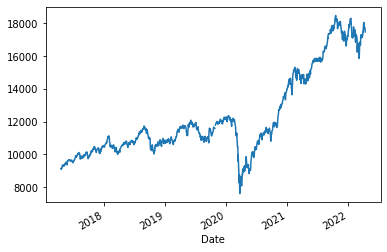

In [9]:
nft['Close'].plot()

In [11]:
len(nft)

1236

In [12]:
nifty_close =nft['Close']

In [13]:
nifty_close

Date
2017-04-17     9139.299805
2017-04-18     9105.150391
2017-04-19     9103.500000
2017-04-20     9136.400391
2017-04-21     9119.400391
                  ...     
2022-04-07    17639.550781
2022-04-08    17784.349609
2022-04-11    17674.949219
2022-04-12    17530.300781
2022-04-13    17475.650391
Name: Close, Length: 1236, dtype: float64

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(nifty_close(0,1))
nifty_close= scaler.fit_tranform(np.array(nifty_close).reshape(-1,1))

NameError: name 'nifty_close' is not defined